## Load clean data

In [1]:
import pandas as pd

import os

path = './data/clean/'
dataframes = {name.split('.')[0]: pd.read_csv(path + name) for name in os.listdir(path) if name != 'holidays.csv'}


### Join data

In [2]:
dataset_names = list(dataframes.keys())

df = dataframes[dataset_names[0]]

for name in dataset_names[1:]:
    df = df.merge(dataframes[name], on=['year', 'month', 'day', 'hour', 'daypart', 'is_holiday', 'common_id'])

df

,year,month,day,hour,daypart,is_holiday,common_id,intensity,occupation,congestion,...,nitrogen_dioxide,nitrogen_monoxide,nitrogen_oxides,non_methane_hydrocarbons,ozone,particles_lt_10,particles_lt_2_5,sulphur_dioxide,toluene,total_hydrocarbons
0,2019,1,1,0,1,1,10,137.536232,2.956522,8.777778,...,73.0,81.0,196.0,NaN,3.08,NaN,NaN,NaN,NaN,NaN
1,2019,1,1,0,1,1,9,53.420000,2.720000,6.820000,...,75.0,60.0,167.0,NaN,1.63,NaN,NaN,NaN,NaN,NaN
2,2019,1,1,0,1,1,8,110.805687,2.924171,6.890995,...,84.0,113.0,257.0,NaN,2.46,NaN,NaN,NaN,NaN,NaN
3,2019,1,1,0,1,1,7,159.027473,0.997253,5.497253,...,104.0,151.0,335.0,NaN,NaN,45.0,31.0,19.0,9.1,NaN
4,2019,1,1,0,1,1,6,99.345133,5.725664,8.876106,...,64.0,28.0,108.0,NaN,NaN,32.0,NaN,16.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322401,2022,9,30,23,1,0,8,170.388186,3.388186,9.341772,...,60.0,4.0,66.0,NaN,18.32,NaN,NaN,NaN,NaN,NaN
322402,2022,9,30,23,1,0,9,103.602410,2.602410,12.277108,...,54.0,5.0,61.0,NaN,23.20,NaN,NaN,NaN,NaN,NaN
322403,2022,9,30,23,1,0,10,167.664634,4.317073,12.490854,...,73.0,36.0,128.0,NaN,NaN,23.0,11.0,NaN,NaN,NaN
322404,2022,9,30,23,1,0,12,185.515152,4.946970,12.287879,...,54.0,2.0,58.0,NaN,17.80,NaN,NaN,NaN,NaN,NaN


### See variables distributions

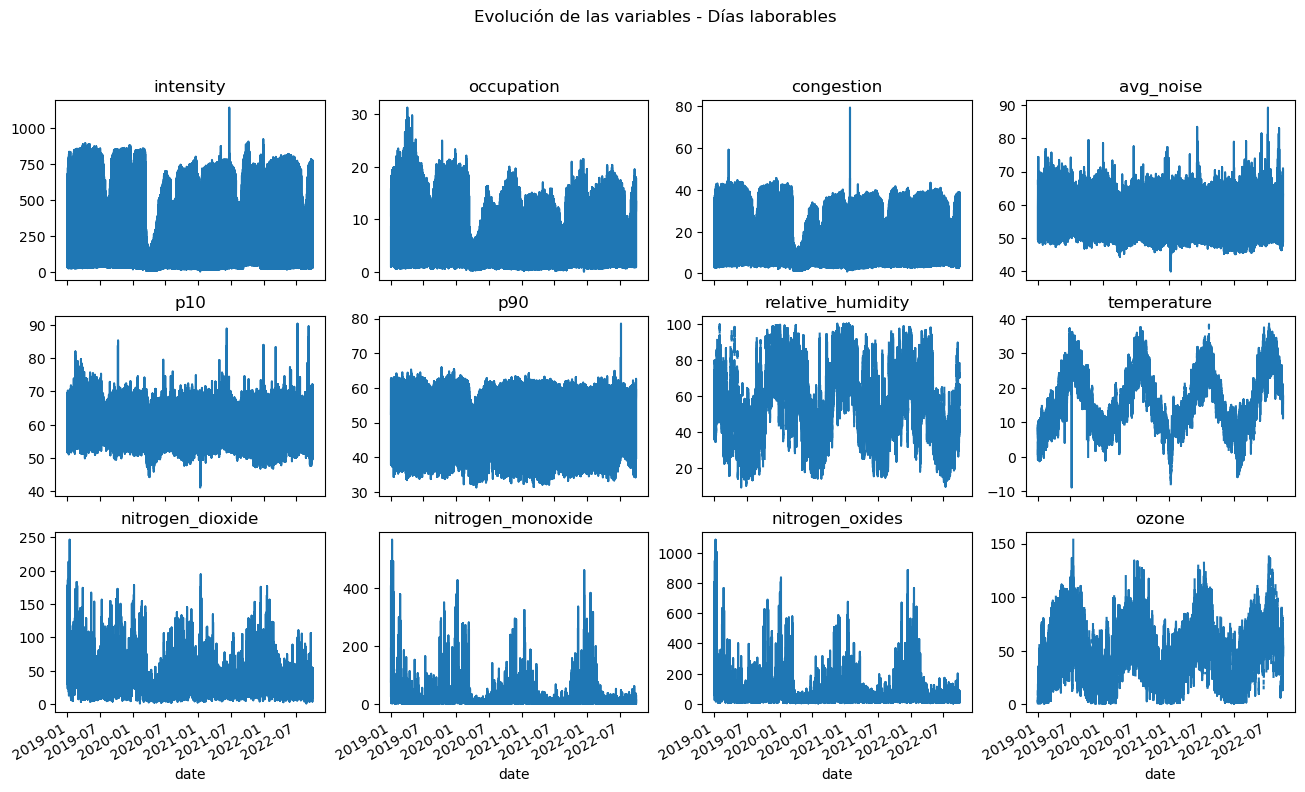

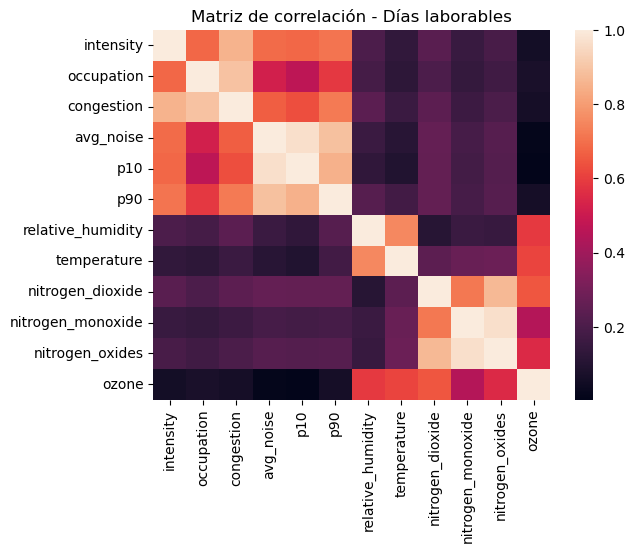

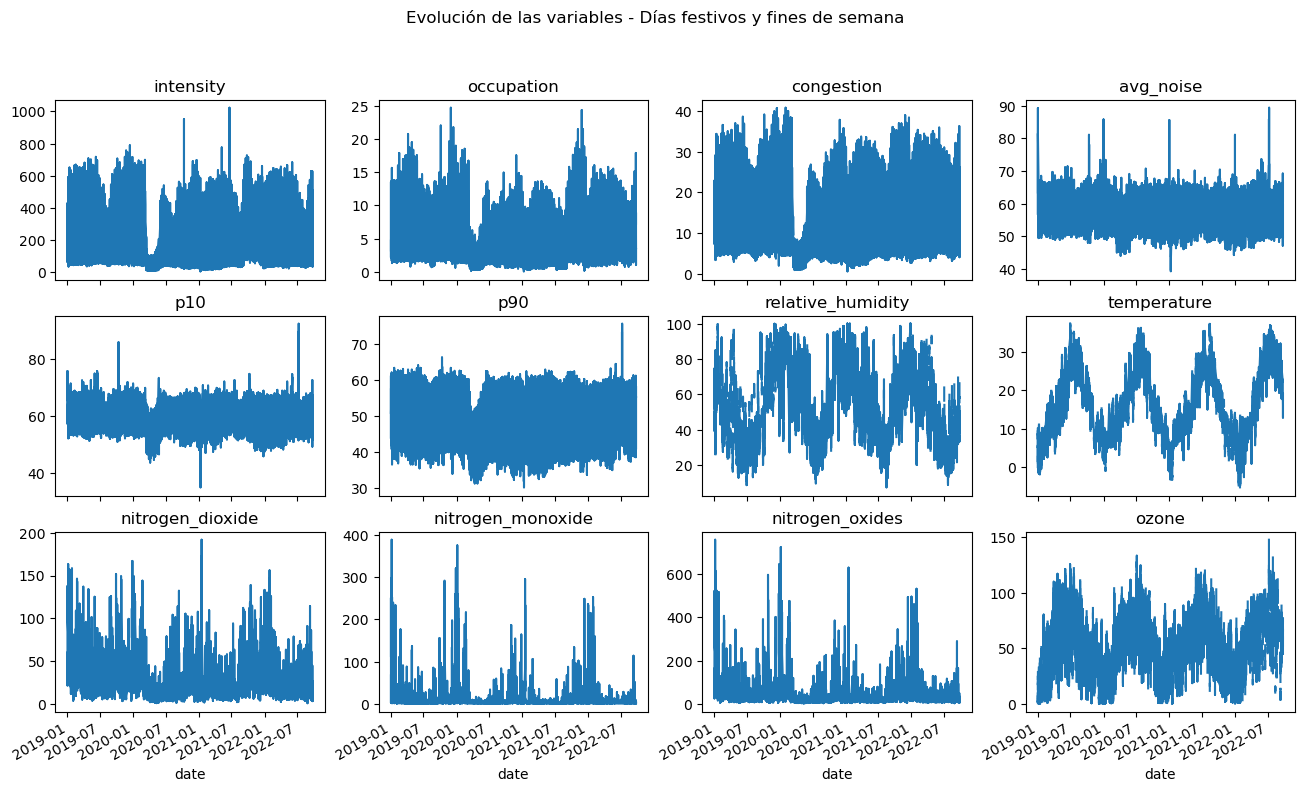

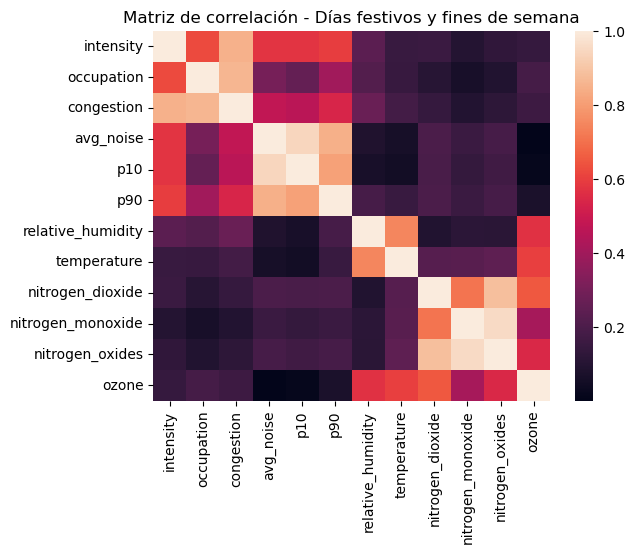

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# group data by (year, month, day, daypart and measure station)
df_grouped = df.groupby(['year', 'month', 'day', 'daypart', 'common_id']).mean().reset_index()

df_grouped['date'] = pd.to_datetime(df_grouped['year'].astype(str) + '/' + 
                                        df_grouped['month'].astype(str) + '/' + 
                                            df_grouped['day'].astype(str), 
                                    format='%Y/%m/%d')

# avoid using these columns for correlation matrix
discard = ['year', 'month', 'day', 'daypart', 'common_id', 'hour', 'is_holiday', 'date']

cols = [c for c in df_grouped.columns if c not in discard]

# discard columns that have >30% of theirs rows with NaN
df_grouped_nan = df_grouped.isna()
for c in cols:
    if df_grouped_nan[c].sum() > 0.3 * df_grouped_nan.shape[0]:
        discard.append(c)

cols = [c for c in df_grouped.columns if c not in discard and c not in ['p01', 'p50', 'p99']]

plt.subplots(3,4,figsize=(16,9))
plt.suptitle('Evolución de las variables - Días laborables')
for i, c in enumerate(cols):
    plt.subplot(3,4,i+1)

    df_grouped[df_grouped['is_holiday'] == 0].set_index('date')[c].plot()
    plt.gcf().autofmt_xdate()

    plt.title(c)
plt.show()

sns.heatmap(df[df['is_holiday'] == 0][cols].corr().abs())
plt.title('Matriz de correlación - Días laborables')
plt.show()

plt.subplots(3,4,figsize=(16,9))
plt.suptitle('Evolución de las variables - Días festivos y fines de semana')
for i, c in enumerate(cols):
    plt.subplot(3,4,i+1)

    df_grouped[df_grouped['is_holiday'] == 1].set_index('date')[c].plot()
    plt.gcf().autofmt_xdate()

    plt.title(c)
plt.show()

sns.heatmap(df[df['is_holiday'] == 1][cols].corr().abs())
plt.title('Matriz de correlación - Días festivos y fines de semana')
plt.show()

There is almost no correlation between traffic data and air quality data. 

There is an apparent correlation between traffic data and noise measurements.